In [1]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

# Load images and labels from directories
train_dir = r"C:\Users\Pratik\Downloads\archive\Fast Food Classification V2\Train"
test_dir = r"C:\Users\Pratik\Downloads\archive\Fast Food Classification V2\Test"
val_dir = r"C:\Users\Pratik\Downloads\archive\Fast Food Classification V2\Valid"



In [ ]:
import os

def load_images_from_directory(directory):
    image_list, label_list = [], []
    classes = os.listdir(directory)
    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip non-directory files like .DS_Store
        for file in os.listdir(class_path):
            image_path = os.path.join(class_path, file)
            image = cv2.imread(image_path)
            image = img_to_array(image)
            image_list.append(image)
            label_list.append(class_name)
    return image_list, label_list

# Load images and labels from directories
x_train, y_train = load_images_from_directory(train_dir)
x_test, y_test = load_images_from_directory(test_dir)
x_val, y_val = load_images_from_directory(val_dir)

In [2]:
import cv2

# Define the target dimensions
target_size = (128, 128)

# Function to load and resize images
def load_images_from_directory(directory, target_size):
    image_list, label_list = [], []
    classes = os.listdir(directory)
    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip non-directory files like .DS_Store
        for file in os.listdir(class_path):
            image_path = os.path.join(class_path, file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, target_size)  # Resize the image
            image = img_to_array(image)
            image_list.append(image)
            label_list.append(class_name)
    return image_list, label_list

# Load images and labels from directories with resizing
x_train, y_train = load_images_from_directory(train_dir, target_size)
x_test, y_test = load_images_from_directory(test_dir, target_size)
x_val, y_val = load_images_from_directory(val_dir, target_size)


In [3]:
# Preprocess the data
x_train = np.array(x_train, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0
x_val = np.array(x_val, dtype="float") / 255.0

# Perform one-hot encoding on the labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_val = lb.transform(y_val)

# Split the validation set further into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)






NameError: name 'classes' is not defined

Epoch 1/30
60/60 [==============================] - 35s 562ms/step - loss: 2.3074 - accuracy: 0.1211 - val_loss: 2.2864 - val_accuracy: 0.1131
Epoch 2/30
60/60 [==============================] - 34s 560ms/step - loss: 2.2743 - accuracy: 0.1430 - val_loss: 2.2213 - val_accuracy: 0.1623
Epoch 3/30
60/60 [==============================] - 34s 562ms/step - loss: 2.2724 - accuracy: 0.1466 - val_loss: 2.2287 - val_accuracy: 0.1674
Epoch 4/30
60/60 [==============================] - 34s 561ms/step - loss: 2.2362 - accuracy: 0.1753 - val_loss: 2.2105 - val_accuracy: 0.2023
Epoch 5/30
60/60 [==============================] - 34s 562ms/step - loss: 2.2211 - accuracy: 0.1805 - val_loss: 2.1566 - val_accuracy: 0.2046
Epoch 6/30
60/60 [==============================] - 34s 568ms/step - loss: 2.1881 - accuracy: 0.1922 - val_loss: 2.1182 - val_accuracy: 0.2206
Epoch 7/30
60/60 [==============================] - 34s 567ms/step - loss: 2.1743 - accuracy: 0.2018 - val_loss: 2.1002 - val_accuracy: 0.2366

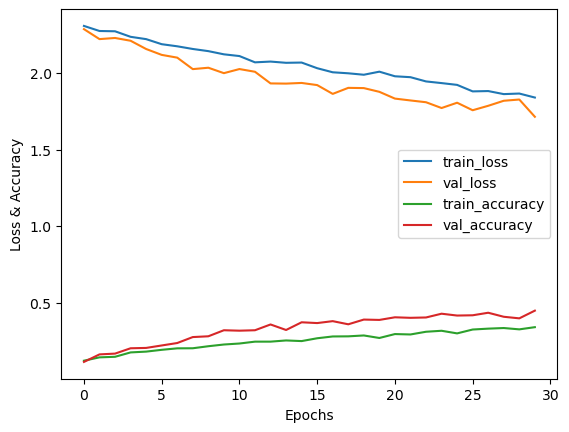

In [4]:
# Define the number of classes based on your dataset
classes = 10  # Correctly define the number of classes

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes, activation="softmax"))  # Use the 'classes' variable here

# Compile the model
learning_rate = 0.0005
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model
batch_size = 64
epochs = 30

# Calculate the number of steps per epoch
steps_per_epoch = 60

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs, steps_per_epoch=steps_per_epoch)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show()


In [13]:
# Visualize the number of classes count
label_counts = pd.DataFrame(y_train).value_counts()
print(label_counts)

# Storing number of classes
num_classes = len(label_counts)
print("Number of classes:", num_classes)

0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  0  0  0  1    1500
                        1  0    1500
                     1  0  0    1500
                  1  0  0  0    1500
               1  0  0  0  0    1500
            1  0  0  0  0  0    1500
         1  0  0  0  0  0  0    1500
      1  0  0  0  0  0  0  0    1500
   1  0  0  0  0  0  0  0  0    1500
1  0  0  0  0  0  0  0  0  0    1500
Name: count, dtype: int64
Number of classes: 10


Epoch 1/50
91/91 [==============================] - 51s 546ms/step - loss: 2.2972 - accuracy: 0.1161 - val_loss: 2.2301 - val_accuracy: 0.1937
Epoch 2/50
91/91 [==============================] - 49s 544ms/step - loss: 2.2542 - accuracy: 0.1513 - val_loss: 2.1959 - val_accuracy: 0.1794
Epoch 3/50
91/91 [==============================] - 49s 543ms/step - loss: 2.2189 - accuracy: 0.1751 - val_loss: 2.1585 - val_accuracy: 0.2000
Epoch 4/50
91/91 [==============================] - 49s 542ms/step - loss: 2.2026 - accuracy: 0.1858 - val_loss: 2.1197 - val_accuracy: 0.2303
Epoch 5/50
91/91 [==============================] - 50s 547ms/step - loss: 2.1767 - accuracy: 0.1952 - val_loss: 2.0915 - val_accuracy: 0.2549
Epoch 6/50
91/91 [==============================] - 49s 536ms/step - loss: 2.1258 - accuracy: 0.2178 - val_loss: 2.0734 - val_accuracy: 0.2714
Epoch 7/50
91/91 [==============================] - 50s 545ms/step - loss: 2.1035 - accuracy: 0.2297 - val_loss: 2.0168 - val_accuracy: 0.2777

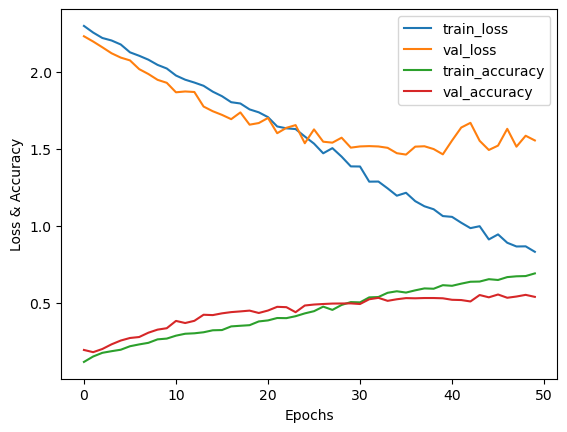

In [5]:
# Define the number of classes based on your dataset
classes = 10  # Correctly define the number of classes

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes, activation="softmax"))  # Use the 'classes' variable here

# Compile the model
learning_rate = 0.0005
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model
batch_size = 64
epochs = 50

# Calculate the number of steps per epoch
steps_per_epoch = 91

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs, steps_per_epoch=steps_per_epoch)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show()

NameError: name 'kerastuner' is not defined

In [7]:
pip install keras-tuner


  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/ff/da/39a5389652e31b135d01833ff52a9cbb6538326150df4fc9f6f28cbfb700/keras_tuner-1.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for keras-core from https://files.pythonhosted.org/packages/95/f7/b8dcff937ea64f822f0d3fe8c6010793406b82d14467cd0e9eecea458a40/keras_core-0.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/2a/4e62ff633612f746f88618852a626bbe24226eba5e7ac90e91dcfd6a414e/rich-13.6.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
     ----------- --------------------------- 30.7/101.3 kB 1.4 MB/s eta 0:00:01
     ----------------------------------- --- 92.2/101.3 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 101.3/101.3 kB 969.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/129.5 kB ? eta -:--:--
   -------

In [10]:
pip install keras-tuner --upgrade


Note: you may need to restart the kernel to use updated packages.


In [15]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Function to build a residual block
def residual_block(x, filters, stride=1, use_projection=False):
    shortcut = x
    if use_projection:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    x = Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x

# Define the ResNet model
def build_resnet(input_shape, num_classes, num_blocks_list):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    for num_blocks in num_blocks_list:
        x = residual_block(x, 64, use_projection=True)
        for _ in range(num_blocks - 1):
            x = residual_block(x, 64)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, x)
    return model

# Define the number of blocks for each stage
num_blocks_list = [2, 2, 2]  # You can adjust this for deeper networks

# Build the ResNet model
model = build_resnet(input_shape=(128, 128, 3), num_classes=10, num_blocks_list=num_blocks_list)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 64, 64, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 64)           256       ['conv2d_6[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 64, 64, 64)           0         ['batch_normalization[0][0

 batch_normalization_9 (Bat  (None, 32, 32, 64)           256       ['conv2d_15[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 activation_7 (Activation)   (None, 32, 32, 64)           0         ['batch_normalization_9[0][0]'
                                                                    ]                             
                                                                                                  
 conv2d_16 (Conv2D)          (None, 32, 32, 64)           36928     ['activation_7[0][0]']        
                                                                                                  
 batch_normalization_10 (Ba  (None, 32, 32, 64)           256       ['conv2d_16[0][0]']           
 tchNormalization)                                                                                
          

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load your data (x_train, y_train, x_val, y_val) and preprocess it
# Define the number of classes in your dataset
num_classes = 10  # Replace with the actual number of classes

# Load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
learning_rate = 0.001  # You can adjust the learning rate
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a reduced step size
batch_size = 64  # You can adjust the batch size
epochs = 50  # You can adjust the number of epochs
steps_per_epoch = 91  # Calculate the steps per epoch

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    steps_per_epoch=steps_per_epoch  # Specify the steps per epoch
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/50
91/91 [==============================] - 126s 1s/step - loss: 2.3132 - accuracy: 0.1272 - val_loss: 2.2477 - val_accuracy: 0.1531
Epoch 2/50
91/91 [==============================] - 119s 1s/step - loss: 2.2512 - accuracy: 0.1511 - val_loss: 2.2241 - val_accuracy: 0.1954
Epoch 3/50
91/91 [==============================] - 120s 1s/step - loss: 2.2288 - accuracy: 0.1777 - val_loss: 2.1952 - val_accuracy: 0.1994
Epoch 4/50
91/91 [==============================] - 119s 1s/step - loss: 2.1938 - accuracy: 0.2005 - val_loss: 2.1842 - val_accuracy: 0.1903
Epoch 5/50
91/91 [==============================] - 118s 1s/step - loss: 2.1834 - accuracy: 0.1939 - val_loss: 2.1878 - val_accuracy: 0.1920
Epoch 6/50
91/91 [==============================] - 117s 1s/step - loss: 2.1579 - accuracy: 0.2152 - val_loss: 2.1668 - val_accuracy: 0.1966
Epoch 7/50
91/91 [==============================] - 118s 1s/step - loss: 2.1432 - accuracy: 0.2232 - val_loss: 2.1523 - val_accuracy: 0.2086
Epoch 8/50
91

Epoch 1/30
91/91 [==============================] - 69s 731ms/step - loss: 2.3031 - accuracy: 0.0916 - val_loss: 2.4884 - val_accuracy: 0.1137
Epoch 2/30
91/91 [==============================] - 51s 560ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.4898 - val_accuracy: 0.1046
Epoch 3/30
91/91 [==============================] - 55s 601ms/step - loss: 2.3029 - accuracy: 0.0938 - val_loss: 2.4839 - val_accuracy: 0.0880
Epoch 4/30
91/91 [==============================] - 54s 594ms/step - loss: 2.3024 - accuracy: 0.0996 - val_loss: 2.4746 - val_accuracy: 0.0874
Epoch 5/30
91/91 [==============================] - 57s 623ms/step - loss: 2.3028 - accuracy: 0.1015 - val_loss: 2.4766 - val_accuracy: 0.0874
Epoch 6/30
91/91 [==============================] - 57s 633ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.4797 - val_accuracy: 0.0880
Epoch 7/30
91/91 [==============================] - 52s 566ms/step - loss: 2.3028 - accuracy: 0.0931 - val_loss: 2.4819 - val_accuracy: 0.0880

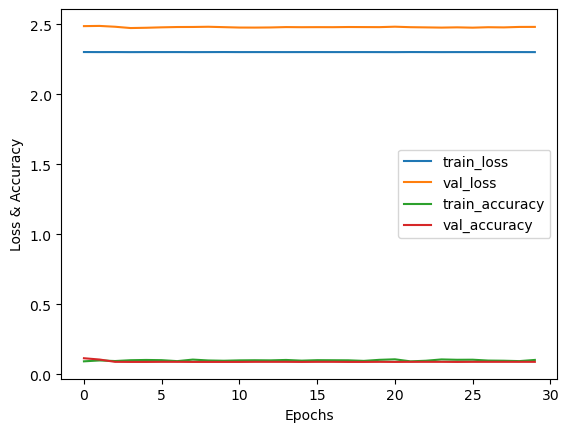

C:\Users\Pratik\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the number of classes based on your dataset
classes = 10  # Correctly define the number of classes

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess images using the data generator
train_generator = datagen.flow(x_train, y_train, batch_size=64)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes, activation="softmax"))

# Compile the model
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model with data augmentation
epochs = 30
steps_per_epoch = 91  # Number of batches per epoch

history = model.fit(train_generator, validation_data=(x_val, y_val), epochs=epochs, steps_per_epoch=steps_per_epoch)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show()

# Save the trained model
model.save(r"C:\Users\Pratik\Downloads\archive\Fast Food Classification V2\dataaugmentation.h5")

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import random

# Define the number of classes based on your dataset
classes = 10  # Correctly define the number of classes

# Define hyperparameter search space
learning_rates = [1e-2, 1e-3, 1e-4]
dropout_rates = [0.0, 0.2, 0.4, 0.6]
#num_filters = [32, 64, 128, 256]
#filter_size = [(3, 3), (5, 5)]

# Initialize variables to store the best hyperparameters and performance
best_hyperparameters = {}
best_accuracy = 0.0

# Number of random search iterations
num_search_iterations = 5

for _ in range(num_search_iterations):
    learning_rate = random.choice(learning_rates)
    dropout_rate = random.choice(dropout_rates)
    #num_filter = random.choice(num_filters)
    #filter_sizes = random.choice(filter_size)

    # Build the CNN model
    model = Sequential()
    model.add(Conv2D(num_filter, filter_sizes, input_shape=(128, 128, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filter, filter_sizes, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filter, filter_sizes, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(classes, activation="softmax"))

    # Compile the model with hyperparameters
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    # Train the model
    batch_size = 64
    epochs = 5

    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs, verbose=0)

    # Evaluate the model on the validation set
    val_accuracy = history.history['val_accuracy'][-1]

    # Check if this set of hyperparameters performs better
    if val_accuracy > best_accuracy:
        best_hyperparameters = {
            'learning_rate': learning_rate,
            'dropout_rate': dropout_rate,
            #'num_filters': num_filter,
            #'filter_size': filter_sizes
        }
        best_accuracy = val_accuracy

# Use the best hyperparameters to build and train the final model
learning_rate = best_hyperparameters['learning_rate']
dropout_rate = best_hyperparameters['dropout_rate']
#num_filter = best_hyperparameters['num_filters']
#filter_sizes = best_hyperparameters['filter_size']

# Build the final model with the best hyperparameters
final_model = Sequential()
final_model.add(Conv2D(num_filter, filter_sizes, input_shape=(128, 128, 3), activation="relu"))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Conv2D(num_filter, filter_sizes, activation="relu"))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Conv2D(num_filter, filter_sizes, activation="relu"))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Flatten())
final_model.add(Dense(64, activation="relu"))
final_model.add(Dropout(dropout_rate))
final_model.add(Dense(classes, activation="softmax"))

# Compile and train the final model
opt = Adam(learning_rate=learning_rate)
final_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
final_history = final_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot the training history of the final model
plt.plot(final_history.history['loss'], label='train_loss')
plt.plot(final_history.history['val_loss'], label='val_loss')
plt.plot(final_history.history['accuracy'], label='train_accuracy')
plt.plot(final_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show()


MemoryError: Unable to allocate 5.49 GiB for an array with shape (15000, 128, 128, 3) and data type float64

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Learning Rate: {best_hyperparameters['learning_rate']}")
print(f"Dropout Rate: {best_hyperparameters['dropout_rate']}")
print(f"Number of Filters: {best_hyperparameters['num_filters']}")
print(f"Filter Size: {best_hyperparameters['filter_size']}")



In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import Hyperband
import numpy as np

# Define your data loading and preprocessing here
# x_train, y_train, x_val, y_val, x_test, y_test = load_and_preprocess_data()

# Define your model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=hp.Int('conv_1_units', min_value=32, max_value=256, step=32),
                            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
                            activation='relu',
                            input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(filters=hp.Int('conv_2_units', min_value=32, max_value=256, step=32),
                            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
                            activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=256, step=32),
                         activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.6, step=0.2)))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize the Hyperband tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,  # Maximum number of epochs for one trial
    factor=3,  # Reduction factor for number of models and epochs
    directory='keras_tuner',  # Directory to save the tuning results
    project_name='my_hyperband_project'  # Name of the tuning project
)

# Perform the hyperparameter search
tuner.search(x_train, y_train, validation_data=(x_val, y_val), verbose=2)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the final model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)
best_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, verbose=2)

# Evaluate the final model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Trial 5 Complete [00h 15m 45s]
val_accuracy: 0.37371429800987244

Best val_accuracy So Far: 0.4051428437232971
Total elapsed time: 01h 11m 05s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
256               |64                |conv_1_units
3                 |3                 |conv_1_kernel
256               |64                |conv_2_units
3                 |3                 |conv_2_kernel
160               |160               |dense_units
0                 |0.4               |dropout
0.001             |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
469/469 - 1361s - loss: 2.3607 - accuracy: 0.1109 - val_loss: 2.2965 - val_accuracy: 0.1251 - 1361s/epoch - 3s/step
Epoch 2/2


KeyboardInterrupt: 